In [2]:
import numpy as np
from sklearn import datasets

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.special import expit
from scipy.linalg import cho_factor, cho_solve, eigvals


from logreg import LogisticRegression
from descent import line_search, gradient_descent

In [3]:
x = np.linspace(0, 6)

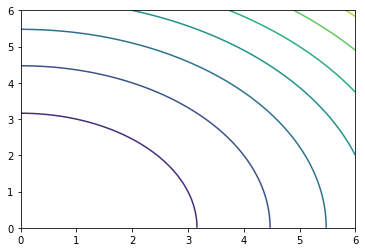

In [5]:
plt.contour(x, x, np.array([[ss(np.array([i, j])) for i in x] for j in x]))

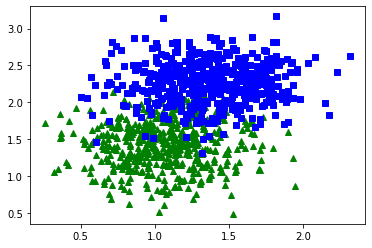

In [6]:
X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=0.3, center_box=(0, 3))
y[y == 0] = -1
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
y = y.reshape(-1, 1)
plt.show()

In [7]:
lr_gd = LogisticRegression(eps=1e-3, compute_alpha=True, method='dichotomy', verbose=50, l2=0.001)
lr_newton = LogisticRegression(eps=1e-3, solver='newton', verbose=1, l2=0.001)

In [10]:
lr_newton.fit(X, y)

Iteration 1, Grad norm: 0.187845, Left: 0.186845
Iteration 2, Grad norm: 0.049871, Left: 0.048871
Iteration 3, Grad norm: 0.012760, Left: 0.011760
Iteration 4, Grad norm: 0.001391, Left: 0.000391
Iteration 5, Grad norm: 0.000017, Left: 0.000000


In [9]:
lr_gd.fit(X, y)

Iteration 50, Grad norm: 0.046394, Left: 0.045140
Iteration 100, Grad norm: 0.030159, Left: 0.028905
Iteration 150, Grad norm: 0.021472, Left: 0.020218
Iteration 200, Grad norm: 0.016078, Left: 0.014824
Iteration 250, Grad norm: 0.012430, Left: 0.011176
Iteration 300, Grad norm: 0.009823, Left: 0.008569
Iteration 350, Grad norm: 0.007886, Left: 0.006632
Iteration 400, Grad norm: 0.006405, Left: 0.005151
Iteration 450, Grad norm: 0.005249, Left: 0.003995
Iteration 500, Grad norm: 0.004332, Left: 0.003078
Iteration 550, Grad norm: 0.003594, Left: 0.002340
Iteration 600, Grad norm: 0.002995, Left: 0.001741
Iteration 650, Grad norm: 0.002505, Left: 0.001251
Iteration 700, Grad norm: 0.002101, Left: 0.000847
Iteration 750, Grad norm: 0.001766, Left: 0.000512
Iteration 800, Grad norm: 0.001488, Left: 0.000234
Iteration 850, Grad norm: 0.001255, Left: 0.000001


In [11]:
print(f'GD Accuracy = {(lr_gd.predict(X) == y).mean()} \n'
      f'Newton Accuracy = {(lr_newton.predict(X) == y).mean()}')

GD Accuracy = 0.93 
Newton Accuracy = 0.93
